# Define the Problem :

>Define the problem you're trying to solve :  Build a machine learning model to predict the
aggregate rating of a restaurant based on other features.

>Determine if it's a classification, regression, or other type of problem

# Notes
>Steps:

Preprocess the dataset by handling missing values,
encoding categorical variables, and splitting the data
into training and testing sets.
>Select a regression algorithm (e.g., linear regression,
decision tree regression) and train it on the training data.

>Evaluate the model's performance using appropriate
regression metrics (e.g., mean squared error, R-squared)
on the testing data.

>Interpret the model's results and analyze the most
influential features affecting restaurant ratings.

# Importing



> Import necassary Libraries




In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

>Importing data

In [236]:
#data=load_data(Dataset.csv)
data=pd.read_csv("/content/drive/MyDrive/RestrauntData.csv")

>visualizing data for understanding

In [237]:
#columns
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [197]:
data.head()

,City,Cuisines,Has_Table_booking,Has_Online_delivery,Rating_text
0,Makati City,"French, Japanese, Desserts",Yes,No,Excellent
1,Makati City,Japanese,Yes,No,Excellent
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",Yes,No,Very Good
3,Mandaluyong City,"Japanese, Sushi",No,No,Excellent
4,Mandaluyong City,"Japanese, Korean",Yes,No,Excellent


>Rename columns as per your understanding

In [238]:
data=data.rename(columns={"Restaurant ID":"Restaurant_ID","Country Code":"Country_Code","Average Cost for two":"Average_Cost_for_two","Has Table booking":"Has_Table_booking","Has Online delivery":"Has_Online_delivery","Price range":"Price_range","Aggregate rating":"Aggregate rating","Rating color":"Rating_color","Rating text":"Rating_text","Aggregate rating":"Aggregate_rating"})

In [209]:
data.columns

Index(['Restaurant_ID', 'Restaurant Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is delivering now', 'Switch to order menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes'],
      dtype='object')

>Remove unwanted columns if they are useless,else remove using heatmap plot

In [239]:
data = data.drop(["Restaurant Name","Locality Verbose","Currency","Is delivering now","Longitude","Latitude","Address","Locality","Switch to order menu","Rating_color"], axis = 1)
#data=data.drop(["Switch to order menu"],axis=1)
#data.columns
data_copy=data

In [240]:
data_copy.columns

Index(['Restaurant_ID', 'Country_Code', 'City', 'Cuisines',
       'Average_Cost_for_two', 'Has_Table_booking', 'Has_Online_delivery',
       'Price_range', 'Aggregate_rating', 'Rating_text', 'Votes'],
      dtype='object')

In [241]:
for i in data.columns:
    print(f"No of categories in {i} are {data[i].value_counts().count()}\n")

No of categories in Restaurant_ID are 9551

No of categories in Country_Code are 15

No of categories in City are 141

No of categories in Cuisines are 1825

No of categories in Average_Cost_for_two are 140

No of categories in Has_Table_booking are 2

No of categories in Has_Online_delivery are 2

No of categories in Price_range are 4

No of categories in Aggregate_rating are 33

No of categories in Rating_text are 6

No of categories in Votes are 1012



In [66]:
data["City"].value_counts()

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

# Data Preprocessing




> Handle missing values




In [242]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100
missing_percentage

Restaurant_ID           0.000000
Country_Code            0.000000
City                    0.000000
Cuisines                0.094231
Average_Cost_for_two    0.000000
Has_Table_booking       0.000000
Has_Online_delivery     0.000000
Price_range             0.000000
Aggregate_rating        0.000000
Rating_text             0.000000
Votes                   0.000000
dtype: float64

In [ ]:
#fill nan
#data=data.fillna().mean()

#knn imputer
# from sklearn.impute import KNNImputer
# impute=KNNImputer()

# for i in data.select_dtypes(include="number"):
#     data[i]=impute.fit_transform(data[[i]])

>Remove duplicates


In [93]:
data.duplicated().sum()

0

>**Handle outliers**


>Boxplots for finding outliers

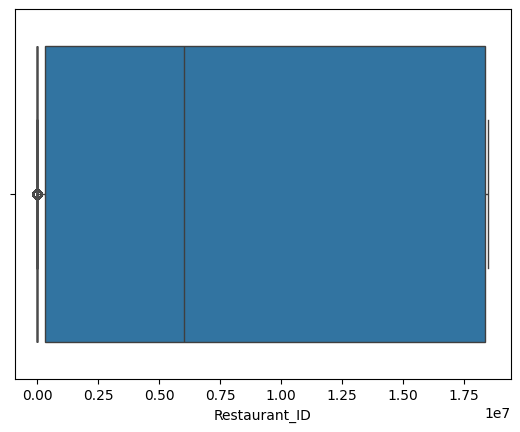

In [103]:
#Boxplot
sns.boxplot(x='Restaurant_ID',data=data)
sns.boxplot(x='Country_Code',data=data)
sns.boxplot(x='Country_Code',data=data)
sns.boxplot(x='Country_Code',data=data)
plt.show()

In [129]:
# Detect outliers
def outlier_detector(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    high_outliers = (data[column] > upper_bound).sum()
    low_outliers = (data[column] < lower_bound).sum()

    outliers_info = {
        'high_outliers': high_outliers,
        'low_outliers': low_outliers,
        'total_outliers': high_outliers + low_outliers
    }
    print(f"outliers in {column} are :{outliers_info}")
    #return outliers_info

ol=outlier_detector(data,"Country_Code")
#data_without_outliers=data[(data["Restaurant_ID"]<lower_bound)&(data["Restaurant_ID"]>upper_bound)]


outliers in Country_Code are :{'high_outliers': 899, 'low_outliers': 0, 'total_outliers': 899}


In [133]:
data["City"]

<class 'pandas.core.series.Series'>
RangeIndex: 9551 entries, 0 to 9550
Series name: City
Non-Null Count  Dtype 
--------------  ----- 
9551 non-null   object
dtypes: object(1)
memory usage: 74.7+ KB


In [138]:
outlier_detector(data,"Restaurant_ID")
outlier_detector(data,"Country_Code")
#outlier_detector(data,"City")
#outlier_detector(data,"Cuisines")
outlier_detector(data,"Average_Cost_for_two")
#outlier_detector(data,"Has_Table_booking")
#outlier_detector(data,"Has_Online_delivery")
outlier_detector(data,"Price_range")
outlier_detector(data,"Aggregate_rating")
#outlier_detector(data,"Rating_text")
outlier_detector(data,"Votes")

outliers in Restaurant_ID are :{'high_outliers': 0, 'low_outliers': 0, 'total_outliers': 0}
outliers in Country_Code are :{'high_outliers': 899, 'low_outliers': 0, 'total_outliers': 899}
outliers in Average_Cost_for_two are :{'high_outliers': 853, 'low_outliers': 0, 'total_outliers': 853}
outliers in Price_range are :{'high_outliers': 586, 'low_outliers': 0, 'total_outliers': 586}
outliers in Aggregate_rating are :{'high_outliers': 0, 'low_outliers': 2148, 'total_outliers': 2148}
outliers in Votes are :{'high_outliers': 1126, 'low_outliers': 0, 'total_outliers': 1126}



>Encode categorical variables


In [244]:
id_data=['Restaurant_ID','Country_Code','Average_Cost_for_two','Price_range','Aggregate_rating','Votes']
id_data=data[id_data]
id_data.columns

Index(['Restaurant_ID', 'Country_Code', 'Average_Cost_for_two', 'Price_range',
       'Aggregate_rating', 'Votes'],
      dtype='object')

In [247]:
data=data.drop(id_data.columns,axis=1)
data.columns

Index(['City', 'Cuisines', 'Has_Table_booking', 'Has_Online_delivery',
       'Rating_text'],
      dtype='object')

In [254]:
encoded_data=pd.get_dummies(data,drop_first=True)
encoded_data.columns#here dont concat id data ,we shouldnt scale id data

Index(['City_Agra', 'City_Ahmedabad', 'City_Albany', 'City_Allahabad',
       'City_Amritsar', 'City_Ankara', 'City_Armidale', 'City_Athens',
       'City_Auckland', 'City_Augusta',
       ...
       'Cuisines_World Cuisine', 'Cuisines_World Cuisine, Mexican, Italian',
       'Cuisines_World Cuisine, Patisserie, Cafe', 'Has_Table_booking_Yes',
       'Has_Online_delivery_Yes', 'Rating_text_Excellent', 'Rating_text_Good',
       'Rating_text_Not rated', 'Rating_text_Poor', 'Rating_text_Very Good'],
      dtype='object', length=1971)

>Normalize/standardize numerical features

In [255]:
encoded_data.describe()

,City_Agra,City_Ahmedabad,City_Albany,City_Allahabad,City_Amritsar,City_Ankara,City_Armidale,City_Athens,City_Auckland,City_Augusta,...,Cuisines_World Cuisine,"Cuisines_World Cuisine, Mexican, Italian","Cuisines_World Cuisine, Patisserie, Cafe",Has_Table_booking_Yes,Has_Online_delivery_Yes,Rating_text_Excellent,Rating_text_Good,Rating_text_Not rated,Rating_text_Poor,Rating_text_Very Good
count,9551,9551,9551,9551,9551,9551,9551,9551,9551,9551,...,9551,9551,9551,9551,9551,9551,9551,9551,9551,9551
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,9531,9530,9531,9531,9530,9531,9550,9531,9531,9531,...,9550,9550,9550,8393,7100,9250,7451,7403,9365,8472


In [256]:
#Min-Max Normalization (Scaling)
#Formula: X_norm = (X - X_min) / (X_max - X_min)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(encoded_data)
scaled_data=pd.DataFrame(scaled_data)

In [ ]:
# Z-Score Normalization (Standardization)
#Formula: X_norm = (X - μ) / σ
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# normalized_data = scaler.fit_transform(data)
# data=pd.DataFrame(data)

In [257]:
#now concat id data
scaled_data=pd.concat([id_data,scaled_data])



Index([       'Restaurant_ID',         'Country_Code', 'Average_Cost_for_two',
                'Price_range',     'Aggregate_rating',                'Votes',
                            0,                      1,                      2,
                            3,
       ...
                         1961,                   1962,                   1963,
                         1964,                   1965,                   1966,
                         1967,                   1968,                   1969,
                         1970],
      dtype='object', length=1977)


In [258]:
#knn imputer
from sklearn.impute import KNNImputer
impute=KNNImputer()

for i in scaled_data.columns:
    scaled_data[i]=impute.fit_transform(scaled_data[[i]])

KeyboardInterrupt: 

In [262]:
#fill nan
scaled_data=scaled_data.fillna(scaled_data.mean())

# Exploratory Data Analysis :

>Visualize data distributions


In [ ]:
#scatterplot
plt.title("title")
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
#sns.set_theme(style="darkgrid")
sns.scatterplot(x=data['colx'],y=data['coly'],data=data,hue='colz')
plt.xlabel('col1')
plt.show()

In [ ]:
#Histplot
plt.title("title")
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
#sns.set_theme(style="darkgrid")
sns.histplot(data['colx'], color='forestgreen', kde=True)
plt.xlabel('col1')
plt.show()

In [ ]:
#lineplot
plt.title("title")
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(x='colx', y='coly', data=data)
plt.xlabel('col1')
plt.show()

In [ ]:
#jointplot type 1
plt.title("title")
plt.figure(figsize=(10, 6))
#sns.set(style="whitegrid")
sns.jointplot(x='Calories', y='Pulse', data=data,kind="kde",fill="True",cmap="YlGnBu")
plt.xlabel('col1')
plt.show()

In [ ]:
#jointplot type 2
plt.title("title")
plt.figure(figsize=(10, 6))
#sns.set(style="whitegrid")
sns.jointplot(x='Calories', y='Pulse', data=data,kind="reg")
plt.show()
plt.xlabel('col1')
plt.show()

In [ ]:
#implot
plt.title("title")
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
#sns.set_theme(style="darkgrid")
sns. lmplot(x="colx",y="coly",data=iris_data, fit_reg=True, ci=None)
plt.xlabel('col1')
plt.show()

In [ ]:
#regplot
plt.title("title")
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
#sns.set_theme(style="darkgrid")
sns.regplot(x='colx', y='coly', data=tips)
plt.xlabel('col1')
plt.show()

In [ ]:
# pairplot
plt.title("title")
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
#sns.set_theme(style="darkgrid")
sns.pairplot(data)plt.xlabel('col1')
plt.show()

>Identify patterns and correlations


In [ ]:
plt.title("title")
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
#sns.set_theme(style="darkgrid")
sns.heatmap(corr=data.corr(),cmap="Greens",annot=True,fmt=".2f")
plt.xlabel('col1')
plt.show()

>Gain insights into the data

# Feature Engineering:


>Create new features



In [ ]:
#create columns with existing data

#speed=distance/time
data["orbital_speed"]=data["distance"]/data["orbital_period"]
data=data.sort_index(axis=1,ascending=True)

>Select relevant features


>Transform existing features

# Data Splitting:





> Split data into training, validation, and test sets



In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(independent_data,dependent_data,random_state=27,test_size=0.2)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

# Model Selection:


>**Import appropriate algorithms**

> Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn .linear_model import LinearRegression
# Advance models
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet

> Classification

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#Advance models
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Model Training:



>Before Training, convert data to np array ,it improves **effeciency** and give good results

In [ ]:
#To improve effeciency ,Before Training ,convert data to np array ,it improves effeciency and give good results

X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

>Train selected models on the training data


In [ ]:
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]# list of models
def predict(modelx,X_train, y_train):
    model=modelx
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    model.score(y_test,y_pred)
    #model_score(y_test,y_pred)

>Use cross-validation to prevent overfitting and **"To find which model performs better"** that model goes to Hyper parameter tuning

In [ ]:
from sklearn.model_selection import cross_val_score#cv=k_folds
Modelscore=cross_val_score(model(),X_train, y_train,cv=3)
print(f"model Average:{Modelscore.mean()}")
Modelscore=cross_val_score(model(),X_train, y_train,cv=3)
print(f"model Average:{Modelscore.mean()}")
#select the best one
# it returns k no of scores ,then we take average an find the best one

# Hyperparameter Tuning:



>Use techniques like Grid Search, Random Search, or Bayesian Optimization


In [ ]:
import optuna

In [ ]:
X,y=independent_data,dependent_data

X = np.array(X)
X = np.nan_to_num(X, nan=np.nanmean(X))

y = np.array(y)
y = np.nan_to_num(y, nan=np.nanmean(y))


In [ ]:
def objective(trial):
    params = {'n_estimators': trial.suggest_int('n_estimators', 100, 1000),#Here use your own params(useful),not entire param list
              'max_depth': trial.suggest_int('max_depth', 10, 50),
              'min_samples_split': trial.suggest_int('min_samples_split', 2, 32),
              'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 32)}

    model = RandomForestRegressor(**params)
    return -cross_val_score(model, X, y, n_jobs=-1, cv=5).mean()#here tweak the crosss validation cv=xyz,your wish

study = optuna.create_study(study_name="hyper param selection .-.",direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(objective, n_trials=25)#Here the tweak to chek more times to get more good results

best_params = study.best_params
best_score = study.best_value
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {-best_score:.3f}")


[I 2024-07-17 08:03:19,712] A new study created in memory with name: hyper param selection .-.
[I 2024-07-17 08:03:25,479] Trial 0 finished with value: 1.2012153838783857 and parameters: {'n_estimators': 437, 'max_depth': 48, 'min_samples_split': 24, 'min_samples_leaf': 20}. Best is trial 0 with value: 1.2012153838783857.
[I 2024-07-17 08:03:28,761] Trial 1 finished with value: 1.1529095355981622 and parameters: {'n_estimators': 240, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 28}. Best is trial 0 with value: 1.2012153838783857.
[I 2024-07-17 08:03:34,005] Trial 2 finished with value: 1.2107551170753683 and parameters: {'n_estimators': 641, 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 32}. Best is trial 2 with value: 1.2107551170753683.
[I 2024-07-17 08:03:43,434] Trial 3 finished with value: 1.5979922317139503 and parameters: {'n_estimators': 850, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 3 with value: 1.59799223171

Best Hyperparameters: {'n_estimators': 794, 'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 4}
Best Accuracy: -1.651


In [ ]:
# Perform the Optuna optimization study as shown in the previous examples
# Visualize optimization history
optuna.visualization.plot_optimization_history(study)
#plt.show()
optuna.visualization.plot_param_importances(study)
# Visualize parameter importance
optuna.visualization.plot_param_importances(study)
#plt.show()

>Find the best hyperparameters for each model

# Model Evaluation:



>Evaluate models on the validation set


>Use appropriate metrics (accuracy, F1-score, RMSE, etc.)

In [ ]:
#Regression Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

def model_score_reg(y_test,y_pred):
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mse)
    print(f"mean_absolute_error:{mae}")
    print(f"mean_squared_error:{mse}")
    print(f"r2_score:{r2},\n     *_*")


#Classification Metrics
from sklearn.metrics import accuracy_score,classification_report,f1_score

def model_accuracy_score_class(y_test,y_pred):
    accuracy_score=accuracy_score(y_test,y_pred)
    classification_report=classification_report(y_test,y_pred)
    f1_score=f1_score(y_test,y_pred)
    printf(f"accuracy_score:{accuracy_score}")
    printf(f"classification_report:{classification_report}")
    printf(f"f1_score:{f1_score}")

# Model Comparison:



>Compare performance of different models


In [ ]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, y_pred, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()

In [ ]:
#comparison in single plot
sns.scatterplot(x=X_train,y=y_train)
sns.scatterplot(y=model.predict(X_test),y=y_train,label=f"model score:{model.score(X_train,y_train)}")
plt.show()

>Select the best performing model

# Final Testing:



>Evaluate the chosen model on the test set


>Ensure it generalizes well to unseen data

# Others


In [ ]:
data=pd.concat([data1,data1],axis=1)